# Single Enhancement

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io
from skimage import color
from scipy import ndimage, misc
from skimage import exposure
from scipy.ndimage import gaussian_filter

In [2]:
img = io.imread('./image-test/PTR98.png')

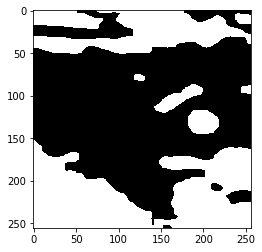

In [3]:
imgg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_gauss = gaussian_filter(imgg, sigma = 2)
rescale = exposure.rescale_intensity(img_gauss, in_range=(60,100))
img_histeq = exposure.equalize_hist(rescale)
img_median = ndimage.median_filter(img_histeq, size=15)
saveimage = cv2.normalize(src=img_median,dst=None,alpha=0, beta=255,norm_type=cv2.NORM_MINMAX,dtype=cv2.CV_8U)
ret, thresh = cv2.threshold(saveimage,1 , 255, cv2.THRESH_BINARY_INV)

plt.imshow(thresh, cmap = 'gray')

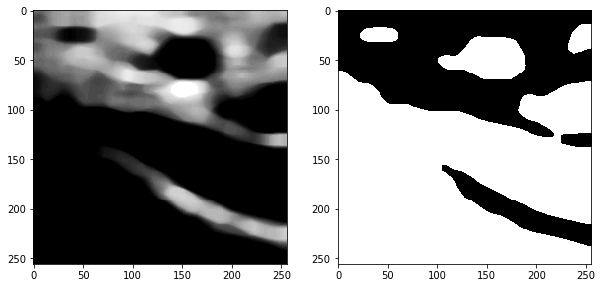

In [5]:
img = io.imread('./image-test/FLT80.png')
ret, thresh = cv2.threshold(img, 55, 255, cv2.THRESH_BINARY_INV)

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,10))
ax1.imshow(img, cmap = 'gray')
ax2.imshow(thresh, cmap = 'gray')